In [5]:
import pandas as pd
import duckdb as db
import matplotlib.pyplot as plt
import math

In [6]:
playlist_metadata = pd.read_parquet("../data/parquet/playlist_metadata.parquet")
playlist_contents = pd.read_parquet("../data/parquet/playlist_contents.parquet")
track_metadata = pd.read_parquet("../data/parquet/track_metadata.parquet")

In [7]:
playlist_metadata.head()

,pid,name,last_modified,num_edits,num_followers,num_artists,num_albums,num_tracks
0,0,Throwbacks,1493424000,6,1,37,47,52
1,1,Awesome Playlist,1506556800,5,1,21,23,39
2,2,korean,1505692800,18,1,31,51,64
3,3,mat,1501027200,4,1,86,107,126
4,4,90s,1401667200,7,2,16,16,17


In [8]:
print(f"Num Playlists: {playlist_metadata.shape[0]}")
print(f"Num Total Tracks: {playlist_contents.shape[0]}")
print(f"Num Unique Tracks: {track_metadata.shape[0]}")
print(f"Num Unique Albums: {track_metadata['album_uri'].nunique()}")
print(f"Num Unique Artists: {track_metadata['artist_uri'].nunique()}")

Num Playlists: 1000000
Num Total Tracks: 66346428
Num Unique Tracks: 2262292
Num Unique Albums: 734684
Num Unique Artists: 295860


In [9]:
print(f"Avg Num Tracks: {playlist_metadata['num_tracks'].mean()}")
print(f"Avg Num Artists: {playlist_metadata['num_artists'].mean()}")
print(f"Avg Num Albums: {playlist_metadata['num_albums'].mean()}")

Avg Num Tracks: 66.346428
Avg Num Artists: 38.088211
Avg Num Albums: 49.597278


In [10]:
def histogram(data, bin_width):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins = range(int(data.min()), int(data.max()) + bin_width, bin_width))
    plt.show()

In [11]:
playlist_metadata[playlist_metadata["num_tracks"] > 250]

,pid,name,last_modified,num_edits,num_followers,num_artists,num_albums,num_tracks
850737,864737,Cha Cha,1507334400,2,1,164,242,376


In [12]:
playlist_contents[playlist_contents["pid"] == 864737]["track_uri"].nunique()

341

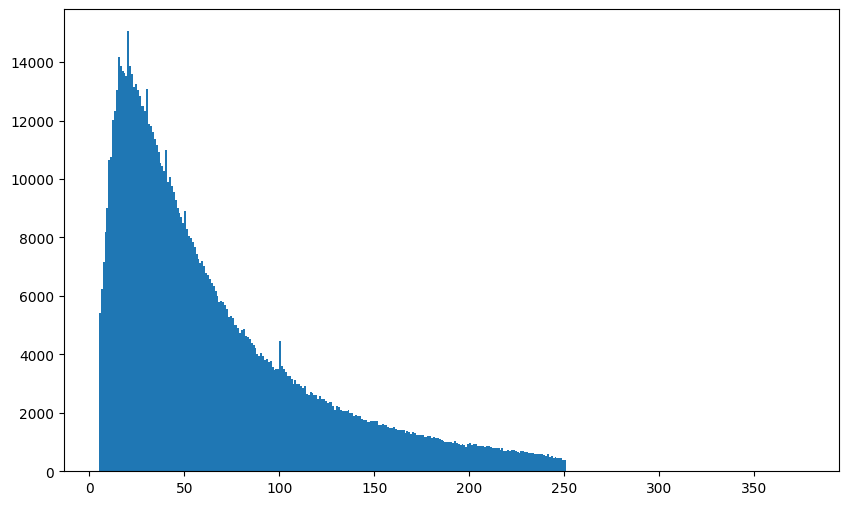

In [13]:
histogram(playlist_metadata["num_tracks"], 1)

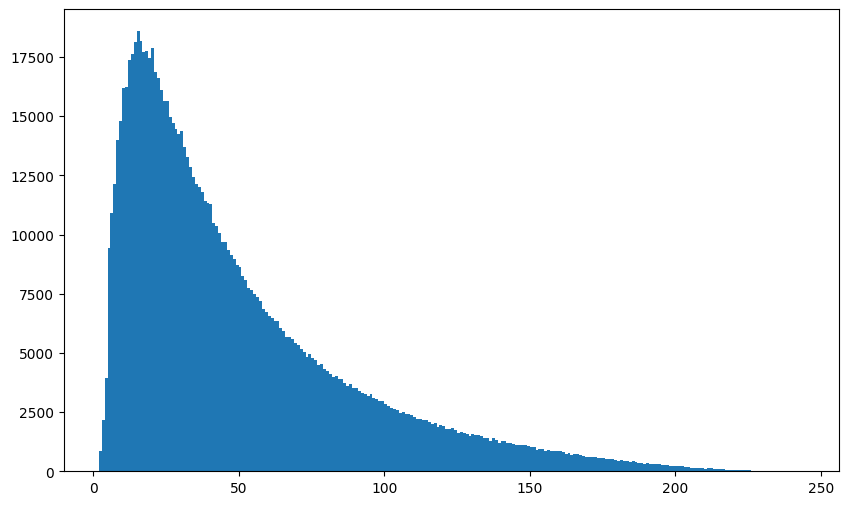

In [14]:
histogram(playlist_metadata["num_albums"], 1)

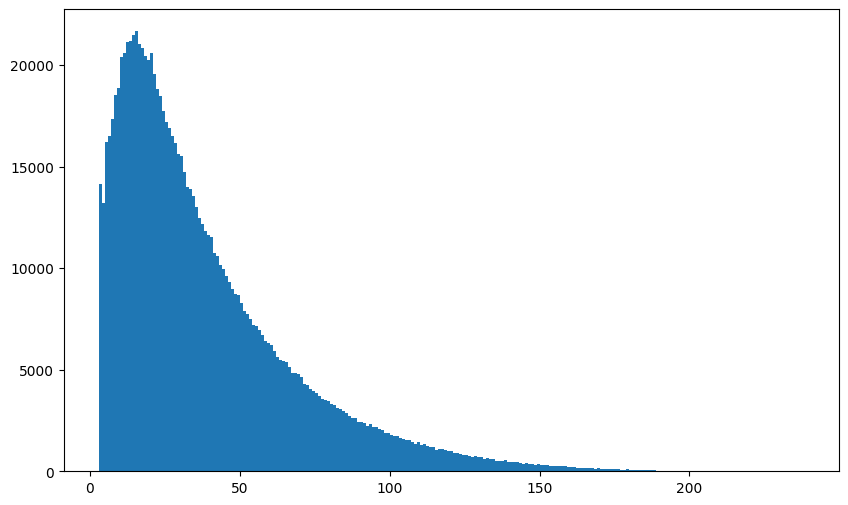

In [15]:
histogram(playlist_metadata["num_artists"], 1)

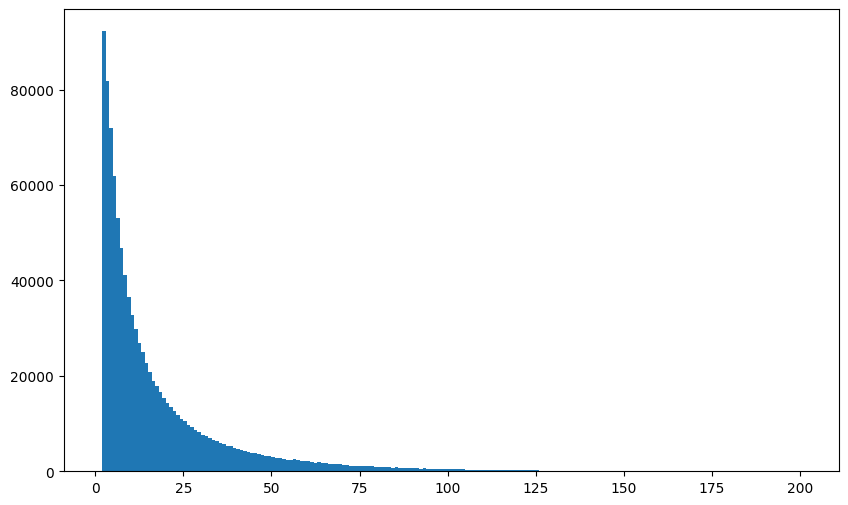

In [16]:
histogram(playlist_metadata["num_edits"], 1)

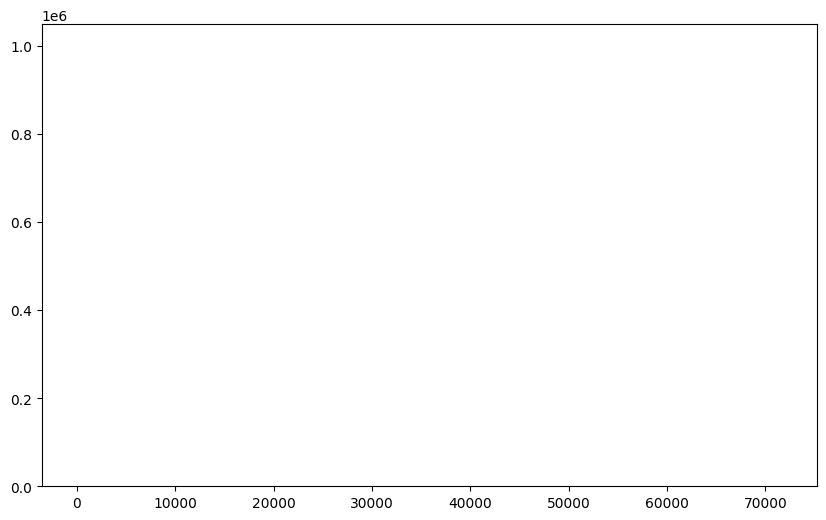

In [17]:
histogram(playlist_metadata["num_followers"], 50)

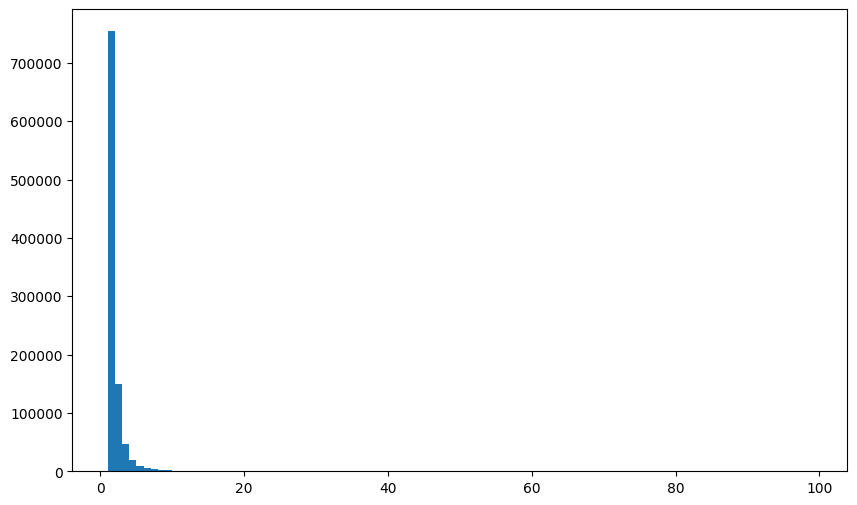

In [18]:
histogram(playlist_metadata[playlist_metadata["num_followers"] < 100]["num_followers"], 1)

In [19]:
playlist_metadata[["num_tracks", "num_albums", "num_artists", "num_edits", "num_followers"]].corr()

,num_tracks,num_albums,num_artists,num_edits,num_followers
num_tracks,1.000000,0.900415,0.818381,0.599767,0.004760
num_albums,0.900415,1.000000,0.956293,0.670720,0.003484
num_artists,0.818381,0.956293,1.000000,0.661896,0.004227
num_edits,0.599767,0.670720,0.661896,1.000000,0.003299
num_followers,0.004760,0.003484,0.004227,0.003299,1.000000


In [20]:
playlist_contents.head()

,pid,track_uri,position
0,0,0UaMYEvWZi0ZqiDOoHU3YI,0
1,0,6I9VzXrHxO9rA9A5euc8Ak,1
2,0,0WqIKmW4BTrj3eJFmnCKMv,2
3,0,1AWQoqb9bSvzTjaLralEkT,3
4,0,1lzr43nnXAijIGYnCT8M8H,4


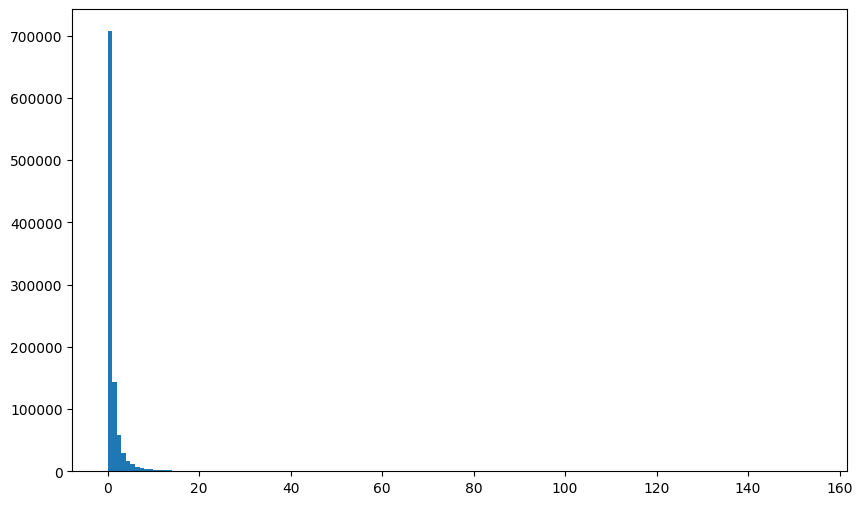

In [21]:
num_repeats = db.sql("""
    SELECT pid, COUNT(track_uri) - COUNT(DISTINCT track_uri) AS num_repeats
    FROM playlist_contents
    GROUP BY pid
    ORDER BY num_repeats
""").df()

histogram(num_repeats["num_repeats"], 1)

In [22]:
num_repeats[num_repeats["num_repeats"] > 0].shape[0]

292851

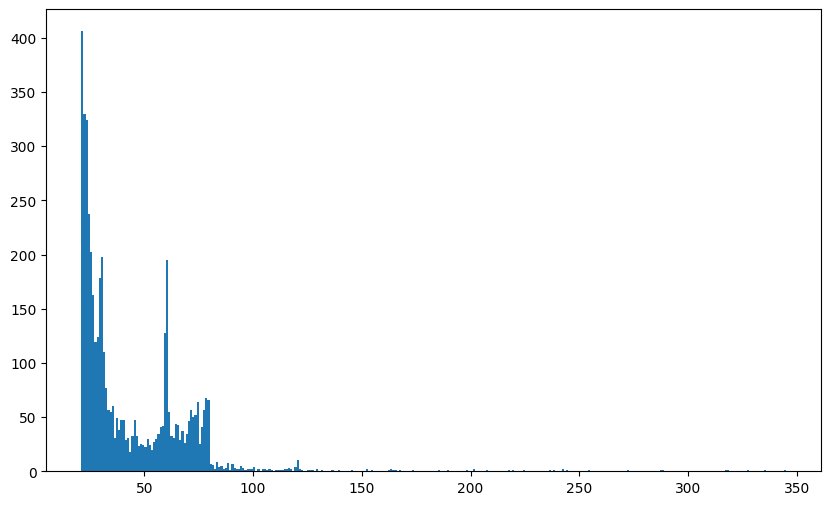

In [23]:
histogram(track_metadata[track_metadata["duration_ms"] // 60000 > 20]["duration_ms"] // 60000, 1)

In [24]:
track_metadata[track_metadata["duration_ms"] // 60000 == 60]

,track_uri,album_uri,artist_uri,track_name,album_name,artist_name,duration_ms
129000,2fTi3xHGVHdMqAYL1yCMNs,2MjlJIYeE6d5PcdBze8dk1,0e6qzpphJHtObTSwD75mi0,We Go Deep - Remix Edition - Continuous Mix,We Go Deep,The Avener,3609889
148502,0Grp18VKRYuwcHltn1sCTv,6CVbYyeOANeLD8UT7ItF8q,5yFCStZWJovRUQvUVBPQwu,Relaxing Beach Campfire,Relaxing Beach Campfire (4 Hours) for Relaxati...,Soul Soother,3616089
220091,3HYKfckpqFcWZbFkHfRQX4,7qW2MAgCAWQY1ak8ENr6ou,1ZtvNuHuQuTofYEtJEm5dD,Gentle Birds and Forest Stream for Relaxation ...,"Bird Sounds - Morning Birds for Relaxation, Me...",Sounds of Nature White Noise Sound Effects,3600000
220092,0t6CQX0cq56YScI0xpk2YG,1FYYVGM9crxpz4TV8jXUSr,1ZtvNuHuQuTofYEtJEm5dD,"Relaxing Thunder Sound, Thunderstorm, Rolling ...","Thunderstorm - A Sound of Thunder, Relaxing Th...",Sounds of Nature White Noise Sound Effects,3600000
220094,67qrFGg310aqPHSB9KMWly,0XmPmpFcIYX1iGDkE09T47,1ZtvNuHuQuTofYEtJEm5dD,"Tropical Ocean Waves, Sound Effects Download, ...",Waves - Tropical Ocean Waves - Relaxing Ocean ...,Sounds of Nature White Noise Sound Effects,3600020
...,...,...,...,...,...,...,...
2257966,2XN2BVoRnoJPWv7tOuGjyf,5GUyLyWd9JBinUJVgHao4h,6dwJxwQAGxM8kjGwjJMqkV,Low Beta 15 Hz (Concentration - Working),"Gravity Beats Cosmical Frequencies & Sounds, B...",Binaural Mind Serenity Delta Theta Gamma Waves,3600021
2258894,18j2VddwjfLAnc6RkvdDvK,1TJWMYWMSi8Frc3VnFvHeM,2zrMz4hqmghaJmsyloscon,Peace And Serenity (use The Healing Power Of N...,5 Hours of Calming & Soothing Ocean Wave Sound...,Song of the Ocean - Best Quality Nature Sounds,3602024
2258895,59QGV1Qsws6f7olFoUN8w4,6GNVFeHI1ZttVfukmMN7JF,7kykPszvwa2xa8VU3j3OkK,Schlafen und Träumen (Natürliches Weisses Raus...,5 Stunden beruhigendes Meeresrauschen - Natürl...,Gesang des Meeres - Die besten Naturklänge und...,3602024
2258896,1PLRwl7q2Nj5eRh1cDnjAK,1TJWMYWMSi8Frc3VnFvHeM,2zrMz4hqmghaJmsyloscon,"Seashore Relaxation (perfect For Spa, Yoga, Ma...",5 Hours of Calming & Soothing Ocean Wave Sound...,Song of the Ocean - Best Quality Nature Sounds,3602024


In [25]:
x = playlist_contents[playlist_contents["track_uri"] == "0Grp18VKRYuwcHltn1sCTv"]["pid"].values

In [26]:
playlist_metadata[playlist_metadata["pid"].isin(x)]

,pid,name,last_modified,num_edits,num_followers,num_artists,num_albums,num_tracks
8033,105033,Sleep Time,1489622400,4,1,6,7,7
25166,120166,relax,1489536000,2,1,17,17,17
58741,150741,Chill,1481155200,8,1,24,27,28
145549,229549,sleep,1502150400,4,1,12,12,14
207729,285729,NATURE SOUNDS,1435881600,2,1,15,24,31
238130,312130,Healing,1500076800,7,1,17,23,64
238442,312442,SLEEP,1469491200,3,1,23,26,45
271134,342134,💤💤,1456704000,3,1,9,14,19
312342,38342,sleep,1441584000,2,1,12,16,20
440657,495657,Sleep Music,1508630400,17,1,107,125,173


In [27]:
playlist_contents[playlist_contents["pid"] == 659834].merge(track_metadata, on="track_uri")

,pid,track_uri,position,album_uri,artist_uri,track_name,album_name,artist_name,duration_ms
0,659834,4sj6Hk441YK66GxLM6M5Iz,0,6amGCB0oKRjnzmbyjapMst,6XjXff8FNS5CqpF8dVAtoo,"If You Think This Song Is About You, It Probab...",D.R.U.G.S.,Destroy Rebuild Until God Shows,150093
1,659834,42GP0xKtkolBnmqQRvSllO,1,4nYsnQpTAQaPzrPc6rOsBN,3utxjLheHaVEd9bPjQRsy8,Welcome Home,Good Apollo I'm Burning Star IV Volume One: Fr...,Coheed and Cambria,374973
2,659834,1biLmduUzRgTYgAeim76q4,2,1xcnuKID1RuI0HhF4h1RSL,5ULEQTVn8PITZVC5PwguDN,Black Maria,Short While Ago,Three Tall Pines,282453
3,659834,2EH1ZVZx2wPGtQb5V2hNih,3,3Apdb6qGTuQe6ac3yqgl9A,4ZWvN9FEfdTea1SEHjpTNi,Good To Sea,Autumn of the Seraphs,Pinback,191933
4,659834,4rc2WNOt2w8BHfQjBC8PO0,4,75Z98z7kl42oWcT0UvtO6e,6guC9FqvlVboSKTI77NG2k,We Own The Night,Instant Gratification,Dance Gavin Dance,205706
...,...,...,...,...,...,...,...,...,...
96,659834,1Hin2DTHCqkG0BRpcbu4tY,96,4KVrN1mStUcHU6ciBL7dHj,1EVWYRr2obCRDoSoD6KSuM,We Run The Night,Flashing Lights,Havana Brown,228188
97,659834,4BkcZC0YMKK3DZbPacifse,97,6bMAkrWl1DJAedPMlzhoqM,4YPVXVT6ryJHGx5lGa56Pk,Sharks,Letters,Eclipses for Eyes,192000
98,659834,3uGk1gDFXQSXPwxVjtcNWu,98,6RqEMiXSrJ2CktsDvztFiA,5RZS0SXUPOybDrsKJUBAP7,Country Crickets Sleep Aid Loop,Country Crickets Sleep Aid Loop - Single,HB,608000
99,659834,3szv5sxIp3u34aQLq3415I,99,4WWw8pQHsxnWaWwpLvwZTS,4tGd3HHlV4RVOdlBc5LAW3,Kuroi Ledge,No Place,A Lot Like Birds,357200


In [28]:
artist_data = db.sql("""
    SELECT artist_uri, FIRST(artist_name) AS artist_name, COUNT(DISTINCT album_uri) AS num_albums, COUNT(DISTINCT track_uri) AS num_tracks
    FROM track_metadata
    GROUP BY artist_uri
""").df()

In [29]:
artist_data.sort_values(by="num_albums")

,artist_uri,artist_name,num_albums,num_tracks
295859,7EcGUDGgNmZ34zCs5jGNdu,Ndala Kasheba,1,1
143008,1DS4YE9GZ1PmhkiOqZJJJ6,GOODWARP,1,1
143009,2EfvLnW0htMQeQCgZ35tFX,Captain Phoenix,1,1
143010,5qjjLsnOGpJs55YNjQq9JT,Ambition²,1,1
143011,59iOp415oyqGlBHyAhu4z3,Kah-Lo,1,1
...,...,...,...,...
110891,3MKCzCnpzw3TjUYs2v7vDA,Pyotr Ilyich Tchaikovsky,799,2609
73917,0LyfQWJT6nXafLPZqxe9Of,Various Artists,1110,2447
73918,2wOqMjp9TyABvtHdOSOTUS,Ludwig van Beethoven,1303,4312
208036,5aIqB5nVVvmFsvSdExz408,Johann Sebastian Bach,1365,5417


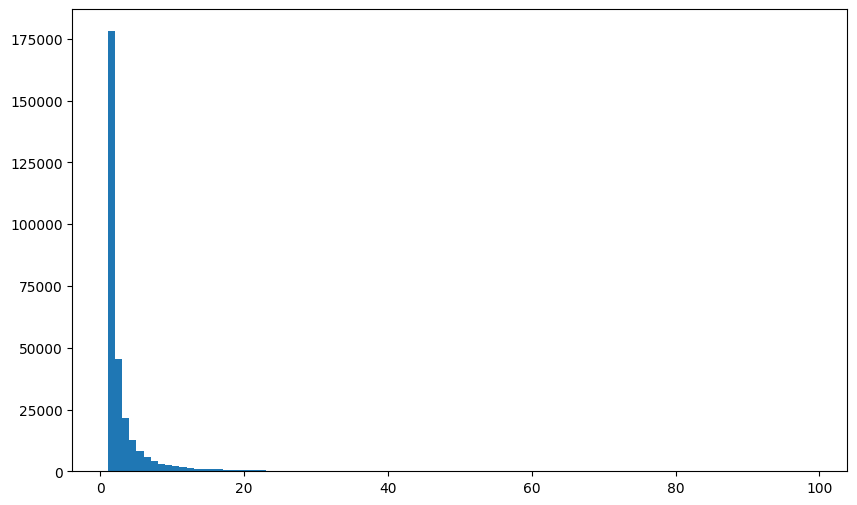

In [30]:
histogram(artist_data[artist_data["num_albums"] < 100]["num_albums"], 1)

In [31]:
album_data = db.sql("""
    SELECT album_uri, FIRST(album_name) AS album_name, FIRST(artist_name) AS artist_name,  COUNT(DISTINCT track_uri) AS num_tracks
    FROM track_metadata
    GROUP BY album_uri
""").df()

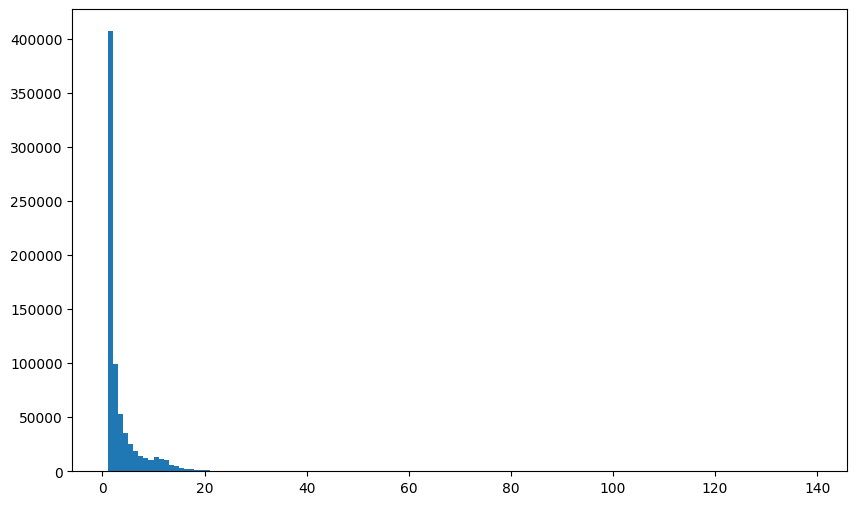

In [32]:
histogram(album_data["num_tracks"], 1)

In [33]:
album_data.sort_values(by="num_tracks")

,album_uri,album_name,artist_name,num_tracks
0,3oIpQjZUFQP5Ernu0SvFLc,Tipsy Love,JT Roach,1
546611,2AltV7hwLcB77QIyWcJZFB,Meneame los Mangos,El Gran Combo De Puerto Rico,1
290392,64Xno2RUJ03hOIHjikwQnA,Adaya Denaia,Ehab Tawfik,1
290391,1a7c5a6rqlcq3KQZkrxPgI,Journey of the Deep Sea Dweller IV,Drexciya,1
290388,53mQjGDLiNdMe28xw6jVyZ,Yo Podría,Lirika Inverza,1
...,...,...,...,...
310656,5dw8l7eXBnmGYUIw9riuwT,123 Favorite Kids Songs,Baby Genius,122
321464,6tQ1p5gjEujiZGAK10pY1f,The Complete Hank Williams,Hank Williams,129
367223,6WlzaRoDShdgVgaqJRjyNH,"Glee: The Music, The Complete Season Two",Glee Cast,131
517433,52nZGRpZ9wuAsaDCwfadr5,Big Vivaldi Box,Paul Angerer,135


In [34]:
playlist_metadata["track_sparsity"] = playlist_metadata["num_tracks"] / track_metadata["track_uri"].nunique()
playlist_metadata["album_sparsity"] = playlist_metadata["num_albums"] / track_metadata["album_uri"].nunique()
playlist_metadata["artist_sparsity"] = playlist_metadata["num_artists"] / track_metadata["artist_uri"].nunique()
playlist_metadata

,pid,name,last_modified,num_edits,num_followers,num_artists,num_albums,num_tracks,track_sparsity,album_sparsity,artist_sparsity
0,0,Throwbacks,1493424000,6,1,37,47,52,0.000023,0.000064,0.000125
1,1,Awesome Playlist,1506556800,5,1,21,23,39,0.000017,0.000031,0.000071
2,2,korean,1505692800,18,1,31,51,64,0.000028,0.000069,0.000105
3,3,mat,1501027200,4,1,86,107,126,0.000056,0.000146,0.000291
4,4,90s,1401667200,7,2,16,16,17,0.000008,0.000022,0.000054
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,Praise,1409529600,5,1,11,23,32,0.000014,0.000031,0.000037
999996,999996,Worship,1475625600,12,1,42,74,122,0.000054,0.000101,0.000142
999997,999997,Sex,1498176000,4,1,17,22,24,0.000011,0.000030,0.000057
999998,999998,✝️,1506816000,6,1,5,8,11,0.000005,0.000011,0.000017


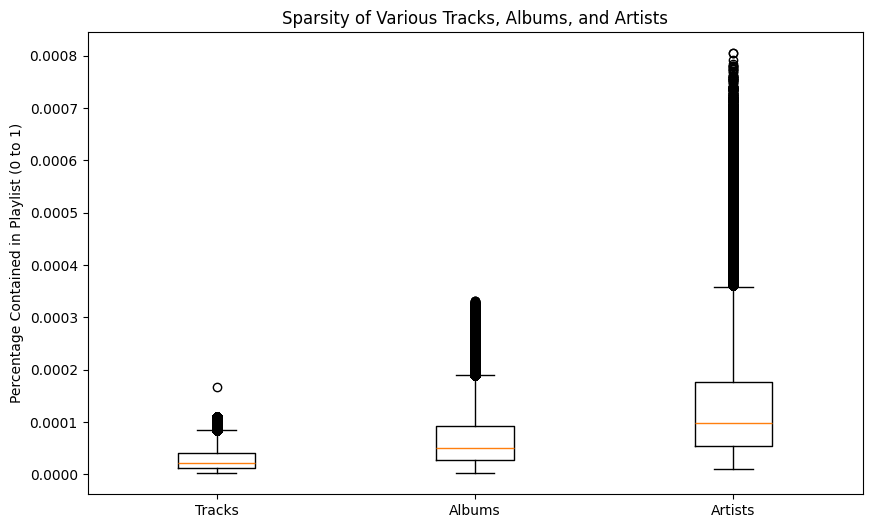

In [45]:
plt.figure(figsize=(10, 6))
plt.boxplot([playlist_metadata["track_sparsity"], playlist_metadata["album_sparsity"], playlist_metadata["artist_sparsity"]], tick_labels=['Tracks', 'Albums', 'Artists'])
plt.ylabel("Percentage Contained in Playlist (0 to 1)")
plt.title("Sparsity of Various Tracks, Albums, and Artists")
plt.show()

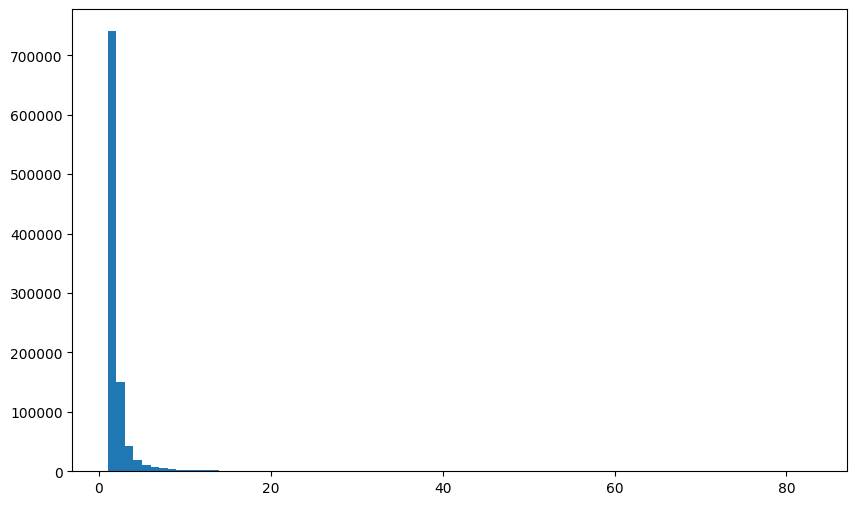

In [36]:
histogram(playlist_metadata["num_tracks"] / playlist_metadata["num_artists"], 1)

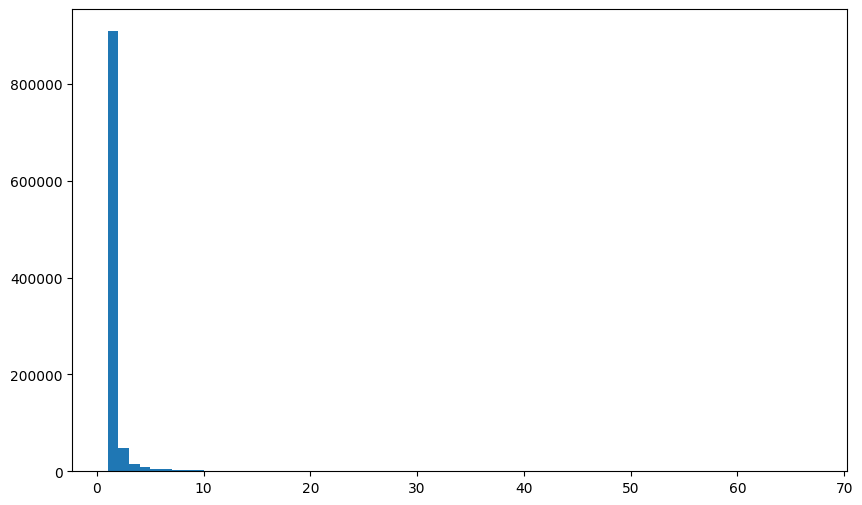

In [37]:
histogram(playlist_metadata["num_tracks"] / playlist_metadata["num_albums"], 1)

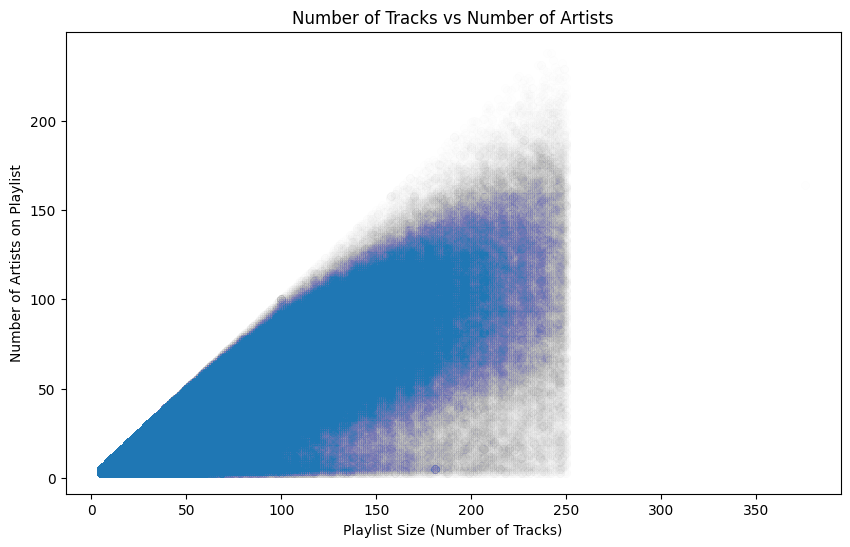

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(x=playlist_metadata["num_tracks"], y=playlist_metadata["num_artists"], alpha=0.002)
plt.xlabel("Playlist Size (Number of Tracks)")
plt.ylabel("Number of Artists on Playlist")
plt.title("Number of Tracks vs Number of Artists")
plt.show()

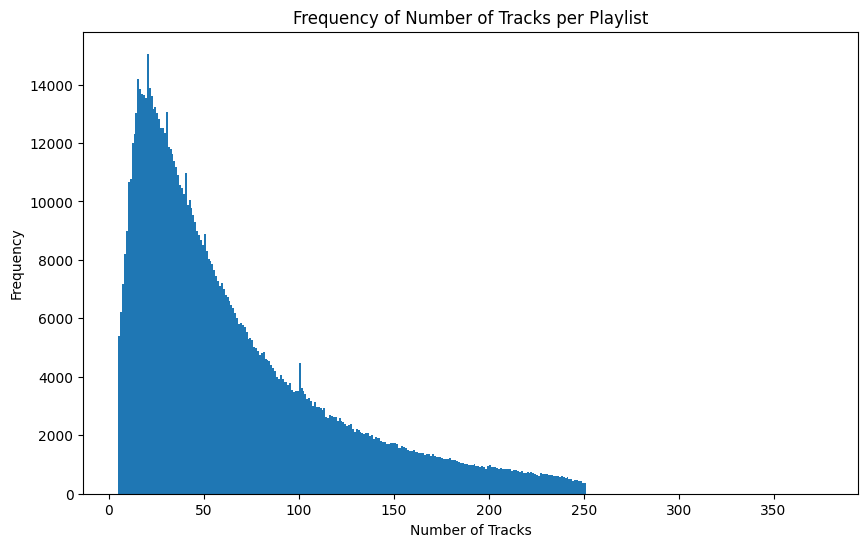

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(playlist_metadata["num_tracks"], bins=range(int(playlist_metadata["num_tracks"].min()), int(playlist_metadata["num_tracks"].max()) + 1, 1))
plt.xlabel("Number of Tracks")
plt.ylabel("Frequency")
plt.title("Frequency of Number of Tracks per Playlist")
plt.show()